<a href="https://colab.research.google.com/github/MaInthiyaz/OasisInfobite_Data-analytics/blob/main/Fraud_Detection()P7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Idea: **Fraud Detection**



**Description:**



Fraud detection involves identifying and preventing deceptive activities within financial
transactions or systems. Leveraging advanced analytics and machine learning techniques, fraud
detection systems aim to distinguish between legitimate and fraudulent behavior. Key
components include anomaly detection, pattern recognition, and real-time monitoring.







**Key Concepts and Challenges:**

Anomaly Detection: Identifying unusual patterns or deviations from normal behavior within
data.
Machine Learning Models: Employing algorithms like Logistic Regression, Decision Trees, or
Neural Networks for predictive analysis.
Feature Engineering: Selecting and transforming relevant features to enhance fraud
detection accuracy.
Real-time Monitoring: Implementing systems that can detect and respond to fraudulent
activities in real-time.
Scalability: Designing fraud detection systems capable of handling large volumes of
transactions efficiently.

In [5]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For creating visual plots
import seaborn as sns  # For statistical data visualization
from sklearn.model_selection import train_test_split  # To split the dataset
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model
from sklearn.neural_network import MLPClassifier  # Neural Network model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score  # For model evaluation


# Step 1: Load Dataset

data = pd.read_csv("creditcard.csv")  # Replace with your fraud dataset filename
print("Dataset Shape:", data.shape)
print(data.head())

Dataset Shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

In [6]:

# Step 2: Data Exploration

print(data.info())  # Overview of the dataset
print(data.describe())  # Statistical summary
print("Missing Values:\n", data.isnull().sum())  # Check for missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:

# Step 3: Data Preprocessing

# Assuming the target column is named 'isFraud'
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target label

# Scale features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Step 4: Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [9]:

# Step 5: Model Training & Evaluation

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Neural Network
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
print("\nNeural Network Classification Report:\n", classification_report(y_test, y_pred_mlp))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.60      0.70       148

    accuracy                           1.00     85443
   macro avg       0.92      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.78      0.74      0.76       148

    accuracy                           1.00     85443
   macro avg       0.89      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443


Neural Network Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.77      0.82       148

    accuracy                           1.00     85443
   m

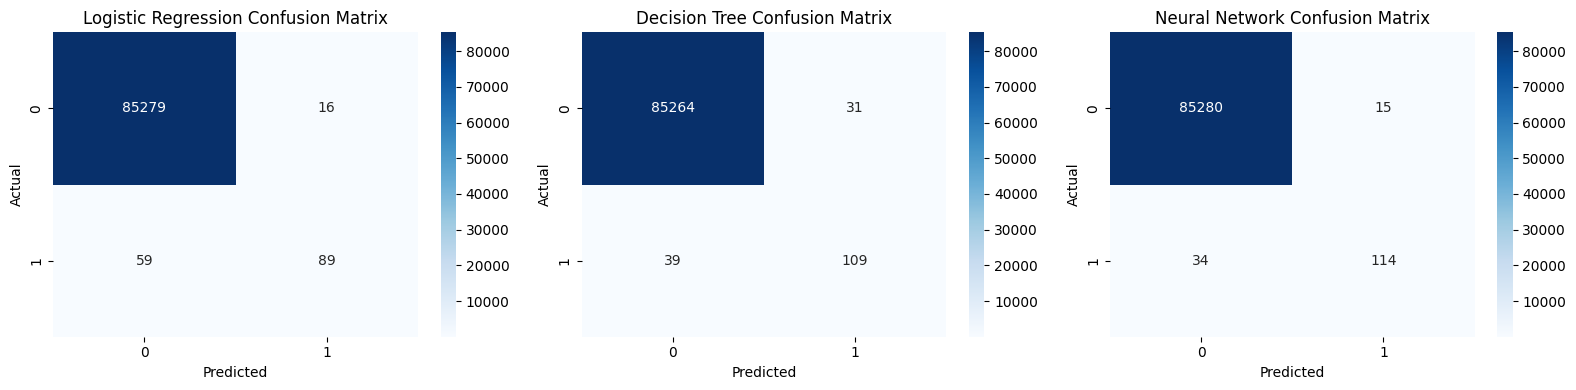

In [10]:

# Step 6: Confusion Matrix Visualization

plt.figure(figsize=(16,4))
models = [y_pred_log, y_pred_dt, y_pred_mlp]
titles = ['Logistic Regression', 'Decision Tree', 'Neural Network']

for i in range(3):
    plt.subplot(1,3,i+1)
    cm = confusion_matrix(y_test, models[i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{titles[i]} Confusion Matrix')

plt.tight_layout()
plt.show()

In [11]:

# Step 7: ROC-AUC Score Comparison

print("\nROC-AUC Scores:")
print("Logistic Regression:", roc_auc_score(y_test, y_pred_log))
print("Decision Tree:", roc_auc_score(y_test, y_pred_dt))
print("Neural Network:", roc_auc_score(y_test, y_pred_mlp))


ROC-AUC Scores:
Logistic Regression: 0.8005818835424908
Decision Tree: 0.8680615209851976
Neural Network: 0.8850472050102743


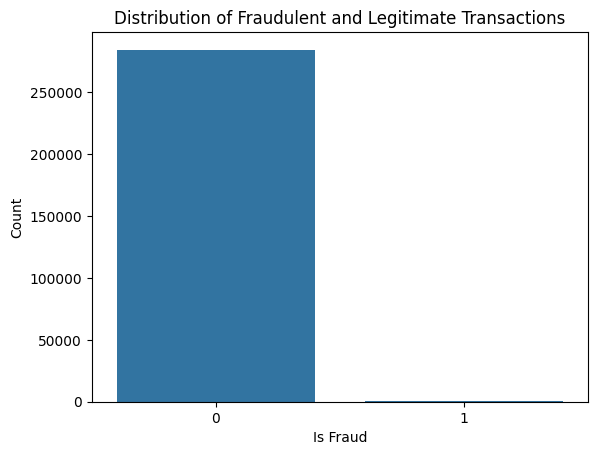

In [12]:

# Step 8: Fraud Class Distribution Visualization

sns.countplot(x='Class', data=data)  # Change 'isFraud' to 'Class'
plt.title('Distribution of Fraudulent and Legitimate Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()